In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
df=pd.read_csv("ECB_FX_USD-quote.csv")
df=df.dropna(axis=1).drop(0)
for column in df.columns:
    if column =="Date":
        df[column] = pd.to_datetime(df[column])
    else:
        df[column]=df[column].apply(float)
df=df.sort_values("Date").reset_index(drop=True).drop("Date",axis=1)


Null model

In [6]:
null = pd.DataFrame({"EUR_dbefore":df["EUR"].shift(),"EUR_day":df["EUR"]}).dropna()

In [7]:
null["Squared_error"] = null.apply(lambda x: (x["EUR_day"]-x["EUR_dbefore"])**2,axis=1)
(null["Squared_error"].sum()/len(null))**0.5

0.007174079683256437

Neural networks

In [6]:
len(df)

6073

In [7]:
len(df)

6073

In [ ]:
#https://towardsdatascience.com/a-quick-deep-learning-recipe-time-series-forecasting-with-keras-in-python-f759923ba64

In [8]:
import numpy as np

In [9]:

def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
    return np.array(X), np.array(Y)

In [10]:
train_size = 900
train,test = df.values[0:train_size,:], df.values[train_size:len(df.values),:]
look_back = 30 #create window size as look_back=30


In [ ]:
#2da dimensione window size
#3za dimensione features

In [12]:
trainX,trainY =convert2matrix(train,look_back)
testX,testY =convert2matrix(test, look_back)
# reshape input to be [samples, window size, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[2], trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],  testX.shape[2], testX.shape[1]))

In [54]:
trainX.shape[2]

18

In [23]:

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from keras.callbacks import EarlyStopping
def model_rnn(look_back):
    model=Sequential()
    model.add(SimpleRNN(units=32, input_shape=(17,look_back), activation="relu"))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(17))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [24]:
model = model_rnn(30)

history=model.fit(trainX,trainY, epochs=100, batch_size=30, verbose=1, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
29/29 [==============================] - 4s 76ms/step - loss: 0.2531 - mse: 0.2531 - mae: 0.3853 - val_loss: 0.1858 - val_mse: 0.1858 - val_mae: 0.3427
Epoch 2/100
29/29 [==============================] - 1s 41ms/step - loss: 0.0403 - mse: 0.0403 - mae: 0.1318 - val_loss: 0.0266 - val_mse: 0.0266 - val_mae: 0.1084
Epoch 3/100
29/29 [==============================] - 1s 44ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0285 - val_loss: 0.0183 - val_mse: 0.0183 - val_mae: 0.0908
Epoch 4/100
29/29 [==============================] - 1s 42ms/step - loss: 9.1550e-04 - mse: 9.1550e-04 - mae: 0.0228 - val_loss: 0.0199 - val_mse: 0.0199 - val_mae: 0.0918
Epoch 5/100
29/29 [==============================] - 1s 40ms/step - loss: 8.2626e-04 - mse: 8.2626e-04 - mae: 0.0220 - val_loss: 0.0194 - val_mse: 0.0194 - val_mae: 0.0915
Epoch 6/100
29/29 [==============================] - 1s 40ms/step - loss: 8.7705e-04 - mse: 8.7705e-04 - mae: 0.0227 - val_loss: 0.0192 - val_mse: 0.0192 - val_mae:

In [26]:
train_predict

array([[ 1.02537930e+00, -7.95720704e-03,  7.81027675e-02, ...,
         4.63865042e-01,  6.41111374e-01,  7.98173696e-02],
       [ 1.02600431e+00, -6.53379969e-03,  7.34021664e-02, ...,
         4.64321822e-01,  6.38443828e-01,  8.38067383e-02],
       [ 1.02568626e+00, -3.27878259e-03,  7.54409730e-02, ...,
         4.63102579e-01,  6.35009110e-01,  8.18050951e-02],
       ...,
       [ 9.59577382e-01,  2.58819014e-03,  3.76761071e-02, ...,
         4.36485320e-01,  6.00156486e-01,  1.05096772e-01],
       [ 9.62539315e-01,  2.94605270e-03,  3.92234437e-02, ...,
         4.34561759e-01,  5.96100092e-01,  9.89695340e-02],
       [ 9.64100540e-01,  8.24060291e-04,  3.57703157e-02, ...,
         4.35966134e-01,  6.00212991e-01,  1.01761445e-01]], dtype=float32)

In [27]:
trainY

array([[1.1238    , 0.00869074, 0.02942116, ..., 0.5473674 , 0.5923154 ,
        0.16329793],
       [1.1176    , 0.00847823, 0.02923359, ..., 0.53591637, 0.58895447,
        0.16150756],
       [1.1253    , 0.00843048, 0.02963655, ..., 0.53790631, 0.58863838,
        0.16313188],
       ...,
       [0.9725    , 0.00831339, 0.03323991, ..., 0.48496484, 0.56448804,
        0.09942848],
       [0.9828    , 0.00841438, 0.03350493, ..., 0.48995463, 0.56720725,
        0.09829966],
       [0.993     , 0.00846403, 0.03408857, ..., 0.49194947, 0.56918491,
        0.0997008 ]])

161/161 [==============================] - 1s 6ms/step
Train Root Mean Squared Error(RMSE): 0.03; Train Mean Absolute Error(MAE) : 0.02 
Test Root Mean Squared Error(RMSE): 0.14; Test Mean Absolute Error(MAE) : 0.09 


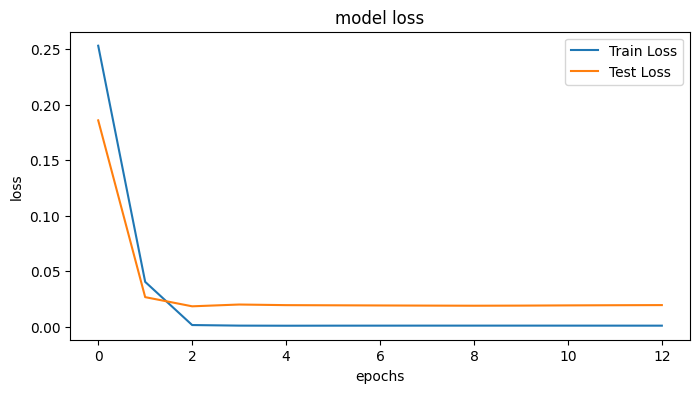

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def model_loss(history):
      plt.figure(figsize=(8,4))
      plt.plot(history.history['loss'], label='Train Loss')
      plt.plot(history.history['val_loss'], label='Test Loss')
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epochs')
      plt.legend(loc='upper right')
      plt.show()
      
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(mean_squared_error(trainY, train_predict)), mean_absolute_error(trainY, train_predict)))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
      % (np.sqrt(mean_squared_error(testY, test_predict)), mean_absolute_error(testY, test_predict)))
model_loss(history)

In [40]:
import seaborn as sns

def prediction_plot(testY, test_predict):
    len_prediction=[x for x in range(len(testY))]
    plt.figure(figsize=(8,4))
    plt.plot(len_prediction, testY[:], marker='.', label="actual")
    plt.plot(len_prediction, test_predict[:], 'r', label="prediction")
    plt.tight_layout()
    sns.despine(top=True)
    plt.subplots_adjust(left=0.07)
    plt.ylabel('Ads Daily Spend', size=15)
    plt.xlabel('Time step', size=15)
    plt.legend(fontsize=15)
    plt.show()

In [37]:
testY.shape

(5143, 17)

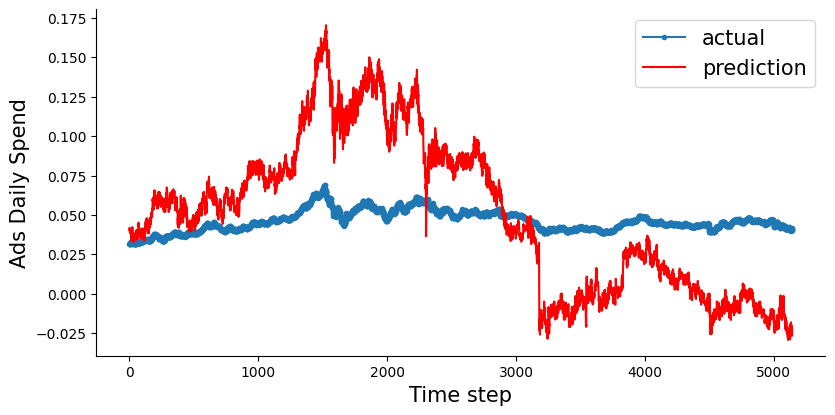

In [41]:
prediction_plot(testY[:,2], test_predict[:,2])

